### Exercise 8

# Task 1


Ładowanie wymaganego pakietu: spatstat.data

Ładowanie wymaganego pakietu: spatstat.univar

spatstat.univar 3.1-1

Ładowanie wymaganego pakietu: spatstat.geom

spatstat.geom 3.3-4

Ładowanie wymaganego pakietu: spatstat.random

spatstat.random 3.3-2

Ładowanie wymaganego pakietu: spatstat.explore

Ładowanie wymaganego pakietu: nlme

spatstat.explore 3.3-3

Ładowanie wymaganego pakietu: spatstat.model

Ładowanie wymaganego pakietu: rpart

spatstat.model 3.3-3

Ładowanie wymaganego pakietu: spatstat.linnet

spatstat.linnet 3.2-3


spatstat 3.3-0 
For an introduction to spatstat, type 'beginner' 




List of 6
 $ window    :List of 4
  ..$ type  : chr "rectangle"
  ..$ xrange: num [1:2] 0 1
  ..$ yrange: num [1:2] 0 1
  ..$ units :List of 3
  .. ..$ singular  : chr "foot"
  .. ..$ plural    : chr "feet"
  .. ..$ multiplier: num 924
  .. ..- attr(*, "class")= chr "unitname"
  ..- attr(*, "class")= chr "owin"
 $ n         : int 2251
 $ x         : num [1:2251] 0.078 0.076 0.051 0.015 0.03 0.102 0.135 0.121 0.04 0.065 ...
 $ y         : num [1:2251] 0.091 0.266 0.225 0.366 0.426 0.474 0.498 0.489 0.596 0.608 ...
 $ markformat: chr "vector"
 $ marks     : Factor w/ 6 levels "blackoak","hickory",..: 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "class")= chr "ppp"


[1] "blackoak" "hickory"  "maple"    "misc"     "redoak"   "whiteoak"

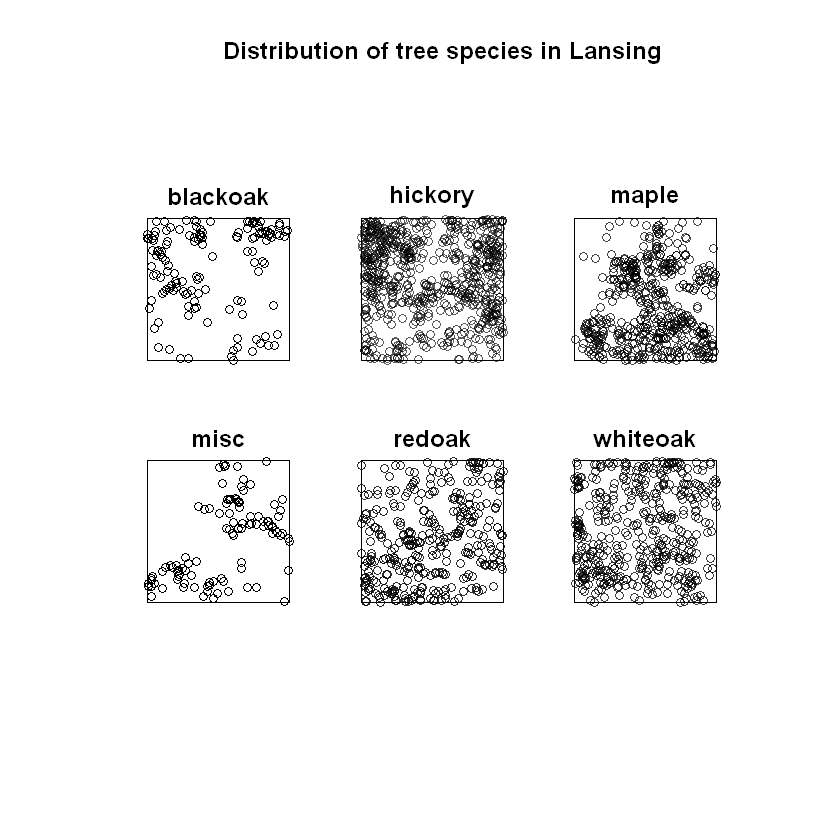

In [1]:
# Loading the spatstat library
library(spatstat)

# Loading the "lansing" dataset (distribution of different tree species)
data("lansing")

# Displaying the structure of the "lansing" dataset
str(lansing)

# Checking unique categories (tree species)
levels(lansing$marks)

# Splitting the point process into sub-processes for each species
split_processes <- split(lansing)

# Visualizing the distribution of tree species
plot(split_processes, main = "Distribution of tree species in Lansing")


# Task 2


[1] "blackoak" "hickory"  "maple"    "misc"     "redoak"   "whiteoak"

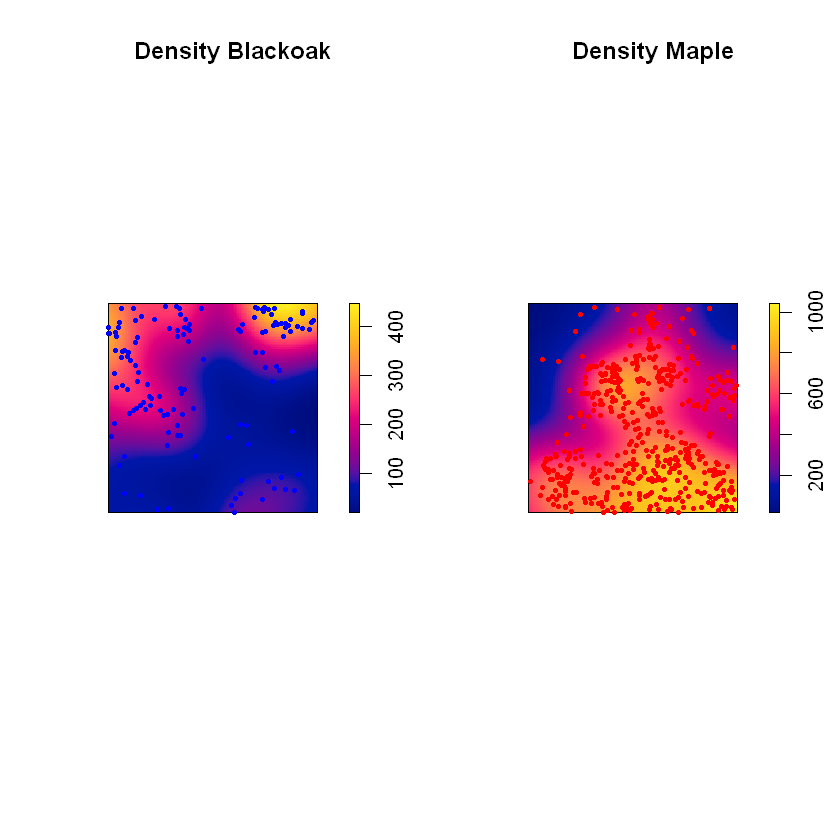

In [2]:
# Displaying the names of sub-processes (tree species)
names(split_processes)

# Extracting the point process for the "blackoak" species
blackoak <- split_processes$blackoak

# Extracting the point process for the "maple" species
maple <- split_processes$maple

# Calculating the kernel density estimator for "blackoak"
blackoak_density <- density(blackoak)

# Calculating the kernel density estimator for "maple"
maple_density <- density(maple)

# Splitting the graphical window into 2 plots side by side
par(mfrow = c(1, 2))

# Visualizing the density for "blackoak"
plot(blackoak_density, main = "Density Blackoak")

# Adding "blackoak" points on the density plot
points(blackoak, pch = 16, cex = 0.5, col = "blue")

# Visualizing the density for "maple"
plot(maple_density, main = "Density Maple")

# Adding "maple" points on the density plot
points(maple, pch = 16, cex = 0.5, col = "red")

# Returning to one plot per window
par(mfrow = c(1, 1))


# Task 3
Fit a point process model for black oak and maple trees assuming constant intensity
for the point processes (homogeneous Poisson process). Use the ppm() function.


In [3]:

# Fitting a homogeneous Poisson model for "blackoak"
ppm_blackoak <- ppm(blackoak, ~1)

# Displaying the summary of the model for "blackoak"
summary(ppm_blackoak)

# Fitting a homogeneous Poisson model for "maple"
ppm_maple <- ppm(maple, ~1)

# Displaying the summary of the model for "maple"
summary(ppm_maple)


Point process model
Fitted to data: blackoak
Fitting method: maximum likelihood
Model was fitted analytically
Call:
ppm.ppp(Q = blackoak, trend = ~1)
Edge correction: "border"
	[border correction distance r = 0 ]
--------------------------------------------------------------------------------
Quadrature scheme (Berman-Turner) = data + dummy + weights

Data pattern:
Planar point pattern:  135 points
Average intensity 135 points per square unit (one unit = 924 feet)
Window: rectangle = [0, 1] x [0, 1] units
Window area = 1 square unit
Unit of length: 924 feet

Dummy quadrature points:
     32 x 32 grid of dummy points, plus 4 corner points
     dummy spacing: 0.03125 units (one unit = 924 feet)

Original dummy parameters: =
Planar point pattern:  1028 points
Average intensity 1030 points per square unit (one unit = 924 feet)
Window: rectangle = [0, 1] x [0, 1] units
Window area = 1 square unit
Unit of length: 924 feet
Quadrature weights:
     (counting weights based on 32 x 32 array of r

Point process model
Fitted to data: maple
Fitting method: maximum likelihood
Model was fitted analytically
Call:
ppm.ppp(Q = maple, trend = ~1)
Edge correction: "border"
	[border correction distance r = 0 ]
--------------------------------------------------------------------------------
Quadrature scheme (Berman-Turner) = data + dummy + weights

Data pattern:
Planar point pattern:  514 points
Average intensity 514 points per square unit (one unit = 924 feet)
Window: rectangle = [0, 1] x [0, 1] units
Window area = 1 square unit
Unit of length: 924 feet

Dummy quadrature points:
     50 x 50 grid of dummy points, plus 4 corner points
     dummy spacing: 0.02 units (one unit = 924 feet)

Original dummy parameters: =
Planar point pattern:  2504 points
Average intensity 2500 points per square unit (one unit = 924 feet)
Window: rectangle = [0, 1] x [0, 1] units
Window area = 1 square unit
Unit of length: 924 feet
Quadrature weights:
     (counting weights based on 50 x 50 array of rectangula

# Task 4
Calculate the intensity variable in space for black oak distribution data.
Assume that the intensity changes linearly. According to the maximum likelihood
method, we will use a log-linear intensity model:
 𝝀𝜽 = 𝐞𝐱𝐩 (𝜽𝟎 + 𝜽𝟏𝒙 + 𝜽𝟐𝒚). Use the ppm function with the parameter ~x + y.


Point process model
Fitted to data: blackoak
Fitting method: maximum likelihood (Berman-Turner approximation)
Model was fitted using glm()
Algorithm converged
Call:
ppm.ppp(Q = blackoak, trend = ~x + y)
Edge correction: "border"
	[border correction distance r = 0 ]
--------------------------------------------------------------------------------
Quadrature scheme (Berman-Turner) = data + dummy + weights

Data pattern:
Planar point pattern:  135 points
Average intensity 135 points per square unit (one unit = 924 feet)
Window: rectangle = [0, 1] x [0, 1] units
Window area = 1 square unit
Unit of length: 924 feet

Dummy quadrature points:
     32 x 32 grid of dummy points, plus 4 corner points
     dummy spacing: 0.03125 units (one unit = 924 feet)

Original dummy parameters: =
Planar point pattern:  1028 points
Average intensity 1030 points per square unit (one unit = 924 feet)
Window: rectangle = [0, 1] x [0, 1] units
Window area = 1 square unit
Unit of length: 924 feet
Quadrature weight

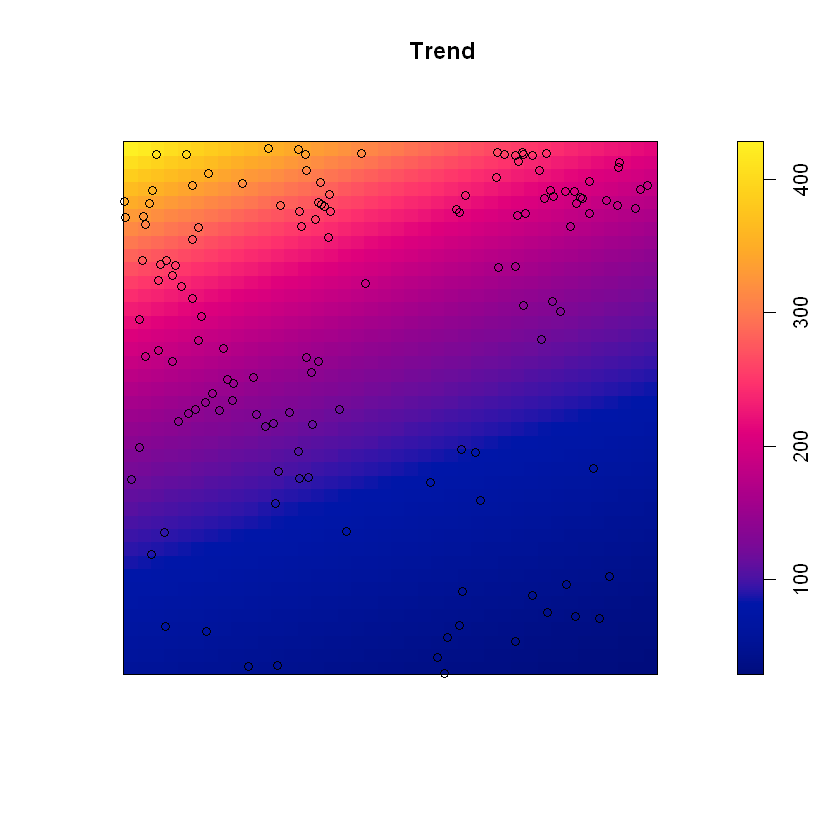

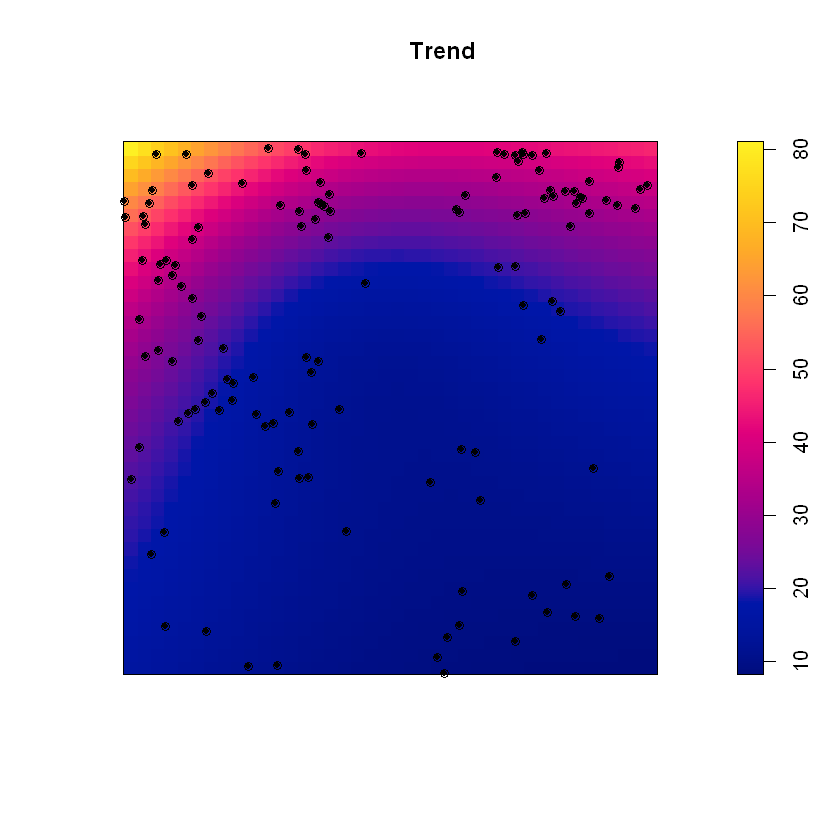

In [4]:

# Fitting a Poisson model with a linear trend (x and y) for "blackoak"
ppm_blackoak_4 <- ppm(blackoak, ~x + y)

# Displaying the summary of the model with the trend for "blackoak"
summary(ppm_blackoak_4)

# Visualizing the trend of the model
plot(ppm_blackoak_4, main = "Trend")

# Adding the "blackoak" points on the trend plot
plot(blackoak, add = TRUE, pch = 20)


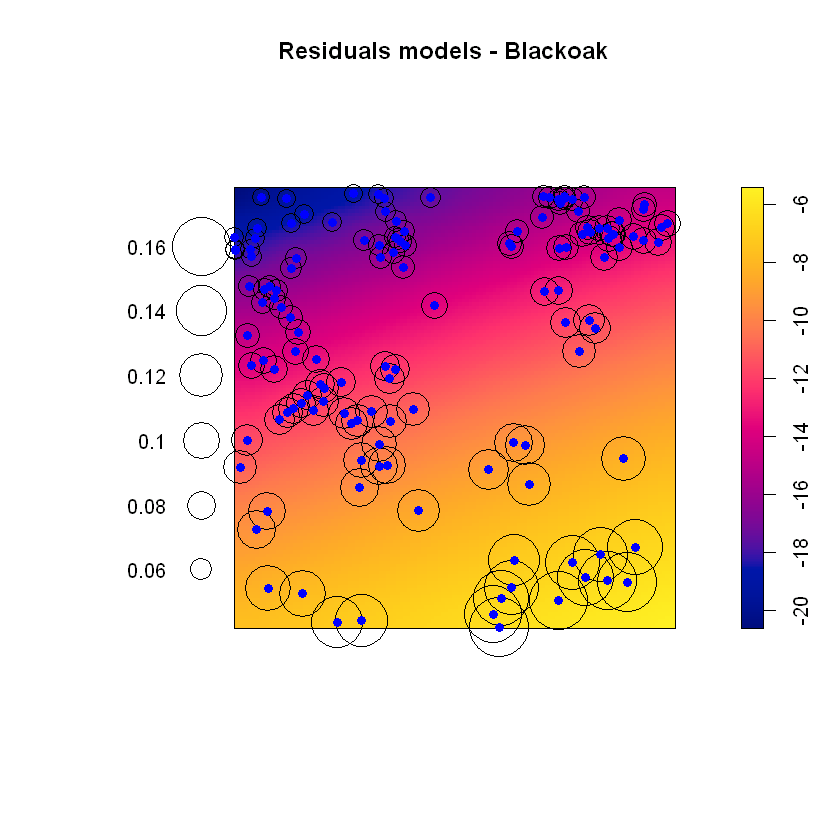

In [7]:
# Calculating the Pearson residuals for the "blackoak" model
residuals_blackoak <- residuals(ppm_blackoak_4, type = "pearson")

# Visualizing the residuals of the model
plot(residuals_blackoak, main = "Residuals models - Blackoak")

# Adding the "blackoak" points on the residuals plot
points(blackoak, pch = 16, col = "blue")


# Task 5
Generate a random process with intensity defined by the parameters of the previously created model.
Initialize the random generator with set.seed(123). Then use the rmh function. 
Calculate the intensity function for the generated model using default parameters.


Extracting model information...Evaluating trend...done.
Checking arguments..determining simulation windows...Evaluating trend integral...


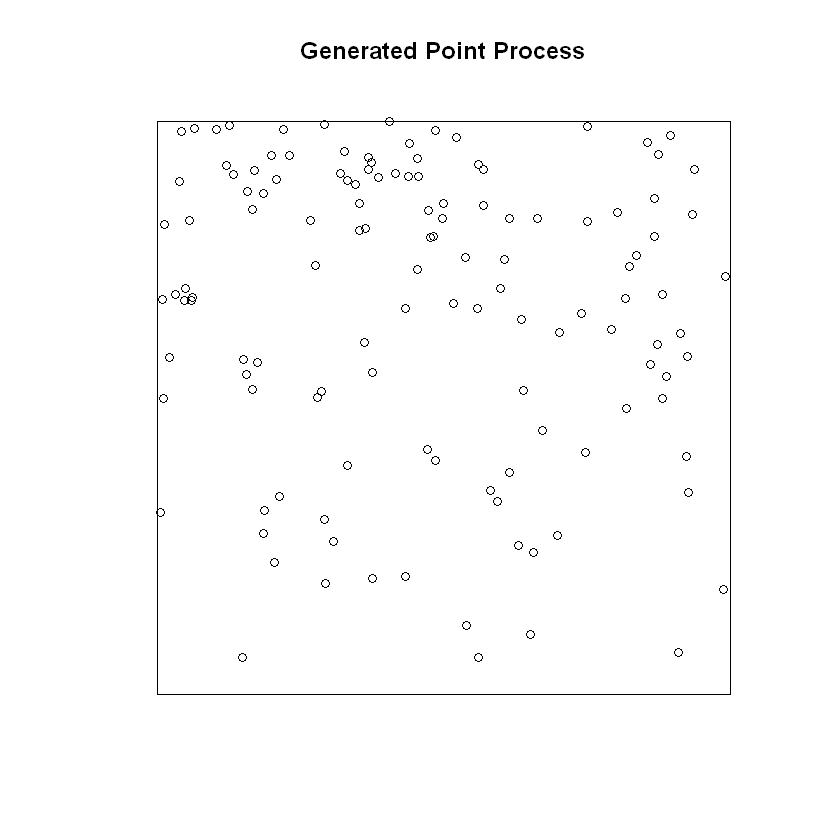

In [8]:

# Setting the seed for reproducibility of results
set.seed(123)

# Generating the point process based on the fitted model
points5 <- rmh(ppm_blackoak_4)

# Visualization of the generated point process
plot(points5, main = "Generated Point Process")


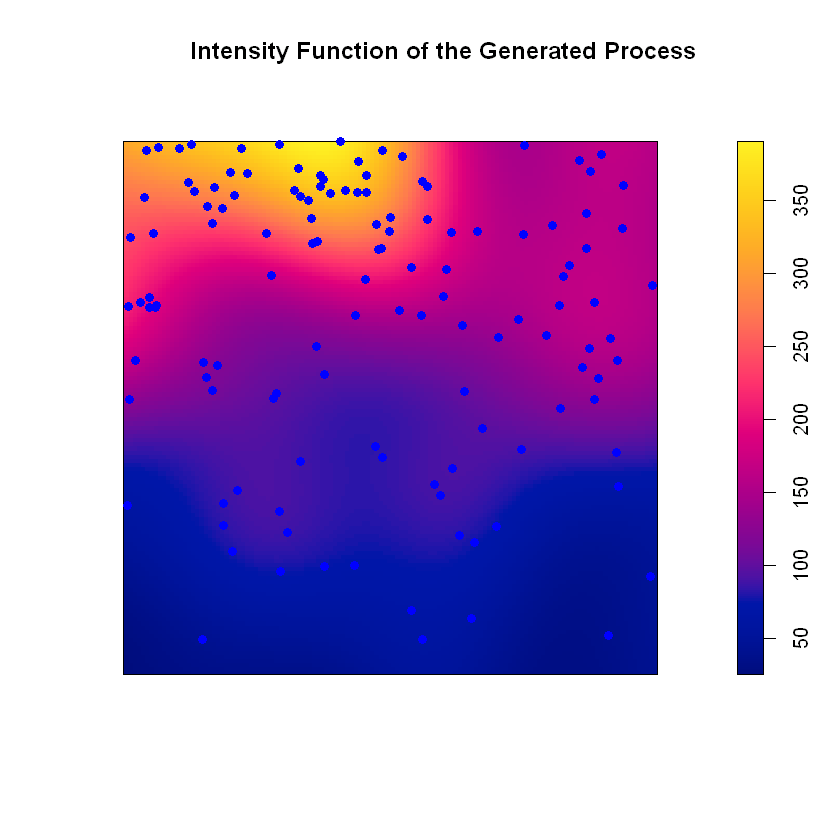

In [9]:
# Calculating the intensity function of the generated process
density5 <- density(points5)

# Visualizing the intensity function of the generated process
plot(density5, main = "Intensity Function of the Generated Process")

# Adding the generated points to the intensity plot
points(points5, pch = 16, col = "blue")


# Task 6

Model diagnostics (raw residuals)
Diagnostics available:
	four-panel plot
	mark plot 
	smoothed residual field
	x cumulative residuals
	y cumulative residuals
	sum of all residuals
sum of raw residuals in entire window = -1.073e-06
area of entire window = 1
quadrature area = 1
range of smoothed field =  [-87.84, 201.9]

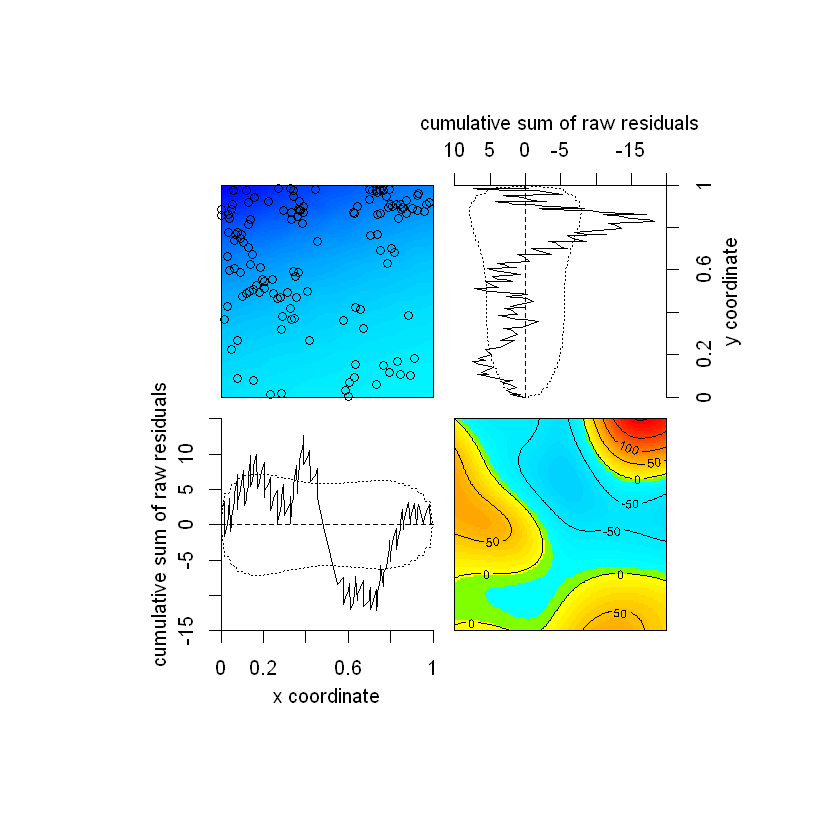

In [10]:
# Model diagnostics for "blackoak"
diagnose.ppm(ppm_blackoak_4)
